# Project_Time Series Analysis of NAICS

## First: fill the empty column in data output file with the data I prepared from my analysis

I consider myself a Data Analyst. The head of my department at my new company has given me the following instructions:
    1. Download zipped files A_NEWLY_HIRED_DATA_ANALYST.zip
    2. Prepare a data set using the following files:
        a. NAICS 2017 – Statistics Canada: 
        Description of the North American Industry Classification System 
        (NAICS). All you would need to understand for this task is, how the 
        NAICS works as a hierarchical structure for defining industries at 
        different levels of aggregation. For example, a 2-digit NAICS industry 
        (e.g., 23 - Construction) is composed of some 3-digit NAICS 
        industries (236 - Construction of buildings, 237 - Heavy and civil 
        engineering construction, and a few more 3-digit NAICS industries).

        Similarly, a 3-digit NAICS industry (e.g., 236 - Construction of 
        buildings), is composed of 4-digit NAICS industries (2361 - 
        Residential building construction and 2362 - Non-residential building 
        construction).
        b. Raw data: 
        15 CSV files beginning with RTRA. These files contain employment 
        data by industry at different levels of aggregation; 2-digit NAICS, 3- 
        digit NAICS, and 4-digit NAICS. Columns mean as follows:
            (i) SYEAR: Survey Year
            (ii) SMTH: Survey Month
            (iii) NAICS: Industry name and associated NAICS code in the 
                               bracket
            (iv) _EMPLOYMENT_: Employment
        c. LMO Detailed Industries by NAICS: 
        An excel file for mapping the RTRA data to the desired data. The 
        first column of this file has a list of 59 industries that are frequently 
        used. The second column has their NAICS definitions. Using these 
        NAICS definitions and RTRA data, you would create a monthly 
        employment data series from 1997 to 2018 for these 59 industries.
        d. Data Output Template: 
        An excel file with an empty column for employment. You should fill 
        the empty column with the data you prepared from your analysis.
        e. Take note of the following: 
            (i) The industry names in the ‘LMO Detailed Industries by NAICS’ 
                match with the industry names in the ‘Data Output Template’. 
                The RTRA data should be used based on the NAICS codes, not 
                by industry names.
           (ii) Try to create each series from the highest possible level of 
                aggregation in the raw data files. For example, if an LMO 
                Detailed Industry is defined with a 2-digit NAICS only, do not 
                use a lower level of aggregation (i.e., 3-digit or 4-digit level 
                NAICS files in the RTRA). Similarly, if an LMO Detailed Industry 
                is defined with a 3-digit NAICS only, do not use the 4-digit 
                NAICS files for that industry.
            (iii) All steps, including merging or appending the data, that would 
                 generate the requested data should be done using python 
                 codes.
            (iv) The source for the data is: Real-Time Remote Access (RTRA) 
                  data from the Labour Force Survey (LFS) by Statistics 
                  Canada.
    3. Highlight at least 5 important questions that you would like to 
    answer in order to provide valuable information to your company so 
    that they can make good business decisions. Your questions should 
    include how employment in Construction evolved over time and how 
    this compares to the total employment across all industries? and at 
    least 4 more questions.

### 1- We read all RTRA_Employ files

In [1]:
# import pandas
import pandas as pd

In [2]:
# read RTRA_Employ_2NAICS_* files
rtra_2_97_99 = pd.read_csv('RTRA_Employ_2NAICS_97_99.csv')
rtra_2_00_05 = pd.read_csv('RTRA_Employ_2NAICS_00_05.csv')
rtra_2_06_10 = pd.read_csv('RTRA_Employ_2NAICS_06_10.csv')
rtra_2_11_15 = pd.read_csv('RTRA_Employ_2NAICS_11_15.csv')
rtra_2_16_20 = pd.read_csv('RTRA_Employ_2NAICS_16_20.csv')

In [3]:
# read RTRA_Employ_3NAICS_* files
rtra_3_97_99 = pd.read_csv('RTRA_Employ_3NAICS_97_99.csv')
rtra_3_00_05 = pd.read_csv('RTRA_Employ_3NAICS_00_05.csv')
rtra_3_06_10 = pd.read_csv('RTRA_Employ_3NAICS_06_10.csv')
rtra_3_11_15 = pd.read_csv('RTRA_Employ_3NAICS_11_15.csv')
rtra_3_16_20 = pd.read_csv('RTRA_Employ_3NAICS_16_20.csv')

In [4]:
# read RTRA_Employ_4NAICS_* files
rtra_4_97_99 = pd.read_csv('RTRA_Employ_4NAICS_97_99.csv')
rtra_4_00_05 = pd.read_csv('RTRA_Employ_4NAICS_00_05.csv')
rtra_4_06_10 = pd.read_csv('RTRA_Employ_4NAICS_06_10.csv')
rtra_4_11_15 = pd.read_csv('RTRA_Employ_4NAICS_11_15.csv')
rtra_4_16_20 = pd.read_csv('RTRA_Employ_4NAICS_16_20.csv')

### appending rtra_2_* dataframes, rtra_3_* dataframes, and rtra_4_* dataframes

In [5]:
# appending rtra_2_* dataframes
rtra_2_all = rtra_2_97_99.append([rtra_2_00_05,
                                    rtra_2_06_10,
                                    rtra_2_11_15,
                                    rtra_2_16_20
                                    ])

In [6]:
# appending rtra_3_* dataframes
rtra_3_all = rtra_3_97_99.append([rtra_3_00_05,
                                    rtra_3_06_10,
                                    rtra_3_11_15,
                                    rtra_3_16_20
                                    ])

In [7]:
# appending rtra_4_* dataframes
rtra_4_all = rtra_4_97_99.append([rtra_4_00_05,
                                    rtra_4_06_10,
                                    rtra_4_11_15,
                                    rtra_4_16_20
                                    ])

### Explore dataframes after appendings

In [8]:
# explore dataframes by checking their shapes
print(rtra_2_97_99.shape, rtra_2_all.shape, 
      rtra_3_97_99.shape, rtra_3_all.shape,
      rtra_4_97_99.shape, rtra_4_all.shape)

(720, 4) (5472, 4) (3708, 4) (28140, 4) (11124, 4) (85572, 4)


In [9]:
# explore dataframes by checking their records
rtra_2_all.head(), rtra_3_all.head(), rtra_4_all.head()

(   SYEAR  SMTH                                              NAICS  \
 0   1997     1               Accommodation and food services [72]   
 1   1997     1  Administrative and support, waste management a...   
 2   1997     1    Agriculture, forestry, fishing and hunting [11]   
 3   1997     1            Arts, entertainment and recreation [71]   
 4   1997     1                                  Construction [23]   
 
    _EMPLOYMENT_  
 0        129250  
 1         58500  
 2         62250  
 3         38750  
 4        118000  ,
    SYEAR  SMTH                                     NAICS  _EMPLOYMENT_
 0   1997     1     Aboriginal public administration[914]           500
 1   1997     1               Accommodation services[721]         24000
 2   1997     1  Administrative and support services[561]         56750
 3   1997     1                   Air transportation[481]         17000
 4   1997     1      Ambulatory health care services[621]         40000,
    SYEAR  SMTH  NAICS  _EMPLO

### prepare data in NAICS column in each data frame to append all rtra_* dataframes

#### - prepare rtra_2_all:
    - extract the code form NAICS column into a new column (naics_code)

In [10]:
naics_list_2 = rtra_2_all.NAICS.str.replace(']','[').str.split('[')
# naics_list_2_2 = rtra_2_all.NAICS.str.slice(-3, -1)
lst_code_2 = []

for i in naics_list_2:
    lst_code_2.append(i[1])
    
rtra_2_all['naics_code'] = lst_code_2
rtra_2_all.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,naics_code
0,1997,1,Accommodation and food services [72],129250,72
1,1997,1,"Administrative and support, waste management a...",58500,56
2,1997,1,"Agriculture, forestry, fishing and hunting [11]",62250,11
3,1997,1,"Arts, entertainment and recreation [71]",38750,71
4,1997,1,Construction [23],118000,23


#### - prepare rtra_3_all:
    - extract the code form NAICS column into a new column (naics_code)

In [11]:
naics_list_3 = rtra_3_all.NAICS.str.replace(']','[').str.split('[')
# naics_list_3_3 = rtra_3_all.NAICS.str.slice(-4, -1)
lst_code_3 = []

for i in naics_list_3:
    if len(i) == 1:
        # for industries that not have code next to them
        lst_code_3.append('000')
    else:
        lst_code_3.append(i[1])
rtra_3_all['naics_code'] = lst_code_3

rtra_3_all.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,naics_code
0,1997,1,Aboriginal public administration[914],500,914
1,1997,1,Accommodation services[721],24000,721
2,1997,1,Administrative and support services[561],56750,561
3,1997,1,Air transportation[481],17000,481
4,1997,1,Ambulatory health care services[621],40000,621


#### - prepare rtra_4_all:
    - copy code form NAICS column into a new column (naics_code) just to unified the column name and transfer it to string

In [12]:
rtra_4_all['naics_code'] = rtra_4_all['NAICS']
rtra_4_all['naics_code'] = rtra_4_all['naics_code'].astype(str)
rtra_4_all.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,naics_code
0,1997,1,1100,3500,1100
1,1997,1,1111,250,1111
2,1997,1,1112,500,1112
3,1997,1,1113,2250,1113
4,1997,1,1114,5250,1114


### Append all rtra_* dataframes into one dataframe

In [13]:
rtra_all = rtra_2_all.append([rtra_3_all, rtra_4_all])
rtra_all.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,naics_code
0,1997,1,Accommodation and food services [72],129250,72
1,1997,1,"Administrative and support, waste management a...",58500,56
2,1997,1,"Agriculture, forestry, fishing and hunting [11]",62250,11
3,1997,1,"Arts, entertainment and recreation [71]",38750,71
4,1997,1,Construction [23],118000,23


### read the LMO_Detailied_Industries_by_NAICS excel file into dataframe

In [14]:
lmo = pd.read_excel('LMO_Detailed_Industries_by_NAICS.xlsx')
lmo.head()

,LMO_Detailed_Industry,NAICS
0,Farms,111 & 112
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211


### Prepare NAICS column to use it with rtra_all dataframe to get information

In [15]:
lmo['naics_code'] = lmo.NAICS.replace('&|,', ' ', regex=True)
lmo.head()

,LMO_Detailed_Industry,NAICS,naics_code
0,Farms,111 & 112,111 112
1,"Fishing, hunting and trapping",114,114
2,Forestry and logging,113,113
3,Support activities for agriculture and forestry,115,115
4,Oil and gas extraction,211,211


### read Data_Output_Template excel file into dataframe

In [16]:
output_df = pd.read_excel('Data_Output_Template.xlsx')
output_df.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,NaN
1,1997,1,Air transportation,NaN
2,1997,1,Ambulatory health care services,NaN
3,1997,1,"Amusement, gambling and recreation industries",NaN
4,1997,1,"Architectural, engineering and related services",NaN


### fill the empty column for employment in output_df dataframe with the data prepared from pervious steps

In [17]:
lst_emp = []
for index, row in output_df.iterrows():
    current_lmo_row = lmo[lmo['LMO_Detailed_Industry'] == row['LMO_Detailed_Industry']]
    current_code = str(current_lmo_row['naics_code'].iloc[0]).split()
    current_month = row['SMTH']
    current_year = row['SYEAR']
    current_emp = rtra_all[(rtra_all['naics_code'].isin(current_code)) & (rtra_all['SMTH'] == current_month) & (rtra_all['SYEAR'] == current_year)]['_EMPLOYMENT_'].sum()
    lst_emp.append(current_emp)

output_df['Employment'] = lst_emp
output_df.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,24000
1,1997,1,Air transportation,17000
2,1997,1,Ambulatory health care services,40000
3,1997,1,"Amusement, gambling and recreation industries",20000
4,1997,1,"Architectural, engineering and related services",27000


In [18]:
# checking for any null values in the employment column
output_df['Employment'].isna().sum()

0

In [19]:
output_df.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,24000
1,1997,1,Air transportation,17000
2,1997,1,Ambulatory health care services,40000
3,1997,1,"Amusement, gambling and recreation industries",20000
4,1997,1,"Architectural, engineering and related services",27000


In [20]:
# Save output data frame in excel data file
output_df.to_excel('new_output.xlsx', index=False)

# Second: Questions

## 1. how employment in Construction evolved over time and how this compares to the total employment across all industries?

In [21]:
output_df.groupby(['LMO_Detailed_Industry']).Employment.agg(['mean', 'max']).sort_values(by='mean', ascending=False)

,mean,max
LMO_Detailed_Industry,,
Other retail trade (excluding cars and personal care),232987.689394,270250
Construction,172291.666667,242750
Food services and drinking places,132701.704545,169000
"Repair, personal and non-profit services",98565.340909,121000
"Business, building and other support services",87191.287879,122250
Hospitals,85296.401515,127000
Elementary and secondary schools,83657.196970,112750
Wholesale trade,77896.780303,99500
"Legal, accounting, design, research, and advertising services",72850.378788,103000


In [22]:
const_df = output_df[output_df['LMO_Detailed_Industry'] == 'Construction']
const_df.head()                    

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
9,1997,1,Construction,118000
68,1997,2,Construction,120000
127,1997,3,Construction,116750
186,1997,4,Construction,125500
245,1997,5,Construction,123750


In [23]:
other_df = output_df[output_df['LMO_Detailed_Industry'] != 'Construction']
other_df.head()  

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,24000
1,1997,1,Air transportation,17000
2,1997,1,Ambulatory health care services,40000
3,1997,1,"Amusement, gambling and recreation industries",20000
4,1997,1,"Architectural, engineering and related services",27000


In [24]:
import matplotlib.pyplot as plt

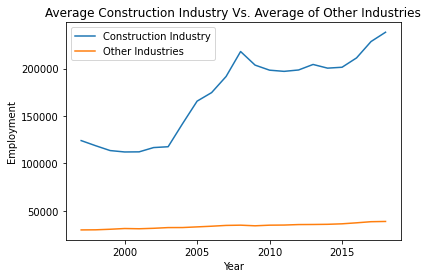

In [27]:
const_df.groupby('SYEAR')['Employment'].mean().plot(x='SYEAR', y='Employment', label='Construction Industry')
other_df.groupby('SYEAR')['Employment'].mean().plot(x='SYEAR', y='Employment', label='Other Industries')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Employment')
plt.title('Average Construction Industry Vs. Average of Other Industries')
plt.show()

<AxesSubplot:xlabel='SYEAR'>

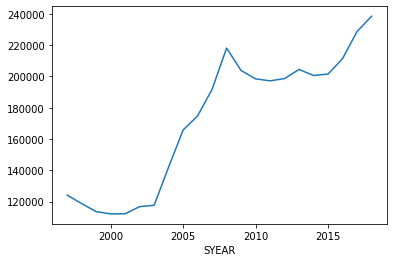

In [28]:
const_df.groupby('SYEAR')['Employment'].mean().plot(x='SYEAR', y='Employment', label='Construction Industry')

<AxesSubplot:xlabel='SYEAR'>

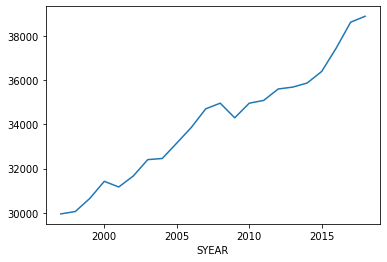

In [29]:
other_df.groupby('SYEAR')['Employment'].mean().plot(x='SYEAR', y='Employment', label='Other Industries')

## Question 2

### 2. What is the industry with maximum employment in one month, and what is the industry with the minimum? 

In [30]:
output_df[output_df['Employment'] == output_df.Employment.max()]

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
14606,2017,8,Other retail trade (excluding cars and persona...,270250


In [32]:
output_df[output_df['Employment'] == output_df.Employment.min()]

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
787,1998,2,Heritage institutions,250
846,1998,3,Heritage institutions,250
2450,2000,6,Oil and gas extraction,250
10517,2011,11,"Fishing, hunting and trapping",250
10635,2012,1,"Fishing, hunting and trapping",250
10694,2012,2,"Fishing, hunting and trapping",250
10753,2012,3,"Fishing, hunting and trapping",250
14765,2017,11,"Fishing, hunting and trapping",250


## Question 3

### What is the average employment for each industry during the years?

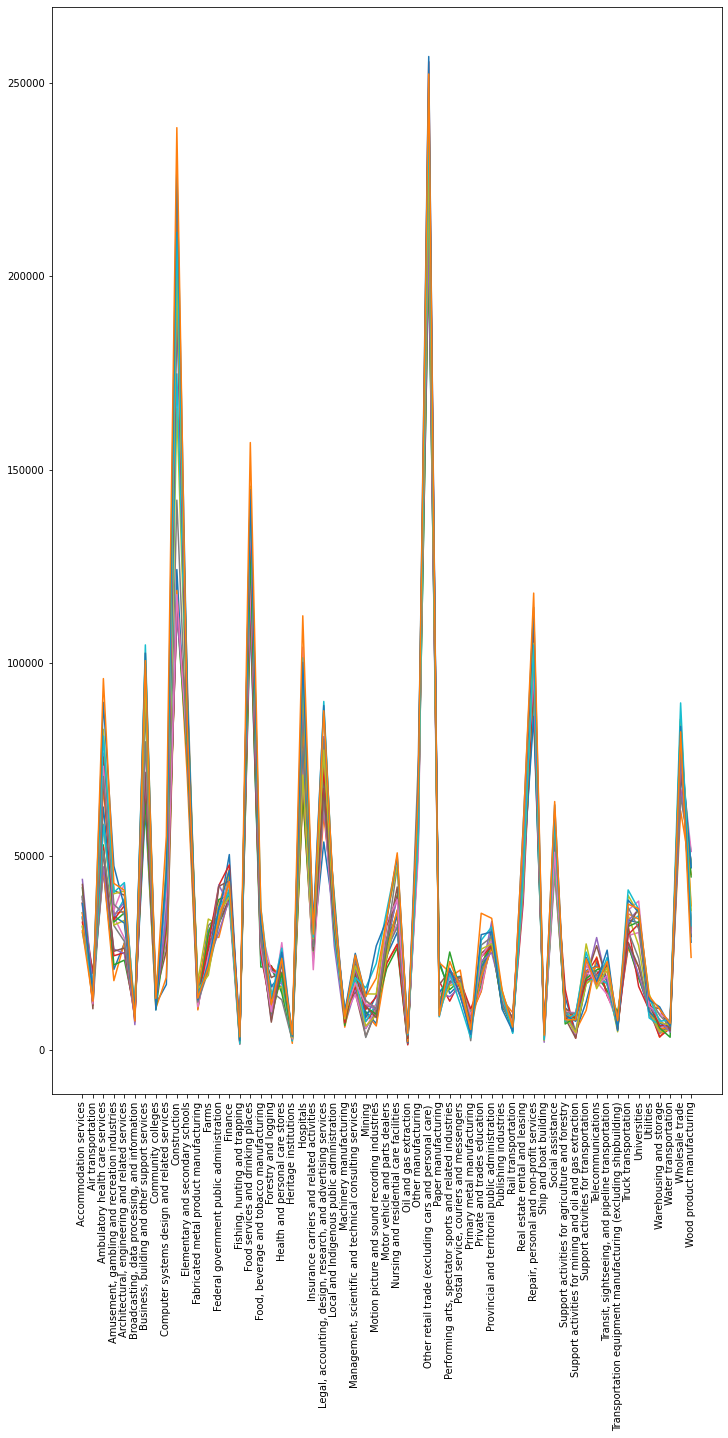

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(12,20))
ax.plot(pd.crosstab(output_df['LMO_Detailed_Industry'], [output_df['SYEAR']], values = output_df['Employment'], aggfunc='mean'))
plt.xticks(rotation='vertical')
plt.show()

In [41]:
pd.crosstab(output_df['LMO_Detailed_Industry'], [output_df['SYEAR']], values = output_df['Employment'], aggfunc='mean')

SYEAR,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
LMO_Detailed_Industry,,,,,,,,,,,,,,,,,,,,,
Accommodation services,31770.833333,33791.666667,35416.666667,37895.833333,44020.833333,39395.833333,37187.500000,39708.333333,37979.166667,34270.833333,...,41833.333333,32958.333333,38791.666667,42729.166667,37916.666667,39583.333333,32020.833333,30354.166667,37770.833333,30770.833333
Air transportation,15854.166667,16708.333333,19854.166667,19729.166667,16166.666667,14208.333333,13958.333333,11500.000000,13166.666667,12354.166667,...,12354.166667,13604.166667,12979.166667,10583.333333,11854.166667,13208.333333,14854.166667,16104.166667,15062.500000,12562.500000
Ambulatory health care services,46145.833333,46625.000000,52958.333333,52458.333333,47291.666667,51104.166667,57750.000000,51354.166667,58291.666667,58062.500000,...,72250.000000,70145.833333,76708.333333,75666.666667,73291.666667,70645.833333,82833.333333,81083.333333,89812.500000,95958.333333
"Amusement, gambling and recreation industries",20750.000000,17854.166667,21916.666667,24291.666667,26000.000000,25458.333333,34375.000000,32104.166667,32229.166667,34208.333333,...,33020.833333,33604.166667,34583.333333,41145.833333,36166.666667,37562.500000,40333.333333,40687.500000,47500.000000,43000.000000
"Architectural, engineering and related services",27541.666667,27625.000000,23166.666667,25083.333333,24895.833333,26291.666667,28854.166667,28000.000000,33437.500000,39062.500000,...,35375.000000,37250.000000,38187.500000,39958.333333,42916.666667,35041.666667,41020.833333,43208.333333,37062.500000,41250.000000
"Broadcasting, data processing, and information",10208.333333,11895.833333,10000.000000,8354.166667,9354.166667,8312.500000,7833.333333,9458.333333,11208.333333,9354.166667,...,9354.166667,7187.500000,6479.166667,8312.500000,9083.333333,8125.000000,10520.833333,8895.833333,9979.166667,7437.500000
"Business, building and other support services",61979.166667,65187.500000,64791.666667,69687.500000,70520.833333,71729.166667,78895.833333,79625.000000,89520.833333,95583.333333,...,97854.166667,95416.666667,94479.166667,96812.500000,98833.333333,87895.833333,93520.833333,104666.666667,102520.833333,100604.166667
Community colleges,11875.000000,10729.166667,14541.666667,14729.166667,16208.333333,14562.500000,13958.333333,14791.666667,13604.166667,16062.500000,...,10375.000000,12020.833333,11562.500000,13229.166667,13229.166667,12791.666667,11208.333333,11458.333333,10250.000000,13291.666667
Computer systems design and related services,16854.166667,18687.500000,27937.500000,31875.000000,34333.333333,25604.166667,28520.833333,31562.500000,31458.333333,36416.666667,...,31375.000000,32625.000000,34166.666667,40541.666667,39687.500000,43833.333333,47979.166667,43500.000000,46250.000000,55229.166667


## Question 4

### What is the year in maximum employment, and the year in minimum ?

Text(0, 0.5, 'Employment')

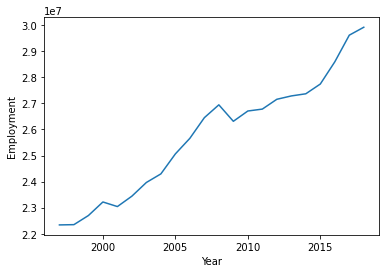

In [42]:
output_df.groupby('SYEAR').Employment.sum().plot()
plt.xlabel('Year')
plt.ylabel('Employment')

In [90]:
output_df.groupby('SYEAR').Employment.sum().sort_values(ascending=False)

SYEAR
2018    29922000
2017    29618000
2016    28594250
2015    27743000
2014    27368750
2013    27286250
2012    27157500
2008    26945000
2011    26781250
2010    26708000
2007    26451750
2009    26313000
2006    25660000
2005    25061750
2004    24294750
2003    23965500
2002    23440250
2000    23217250
2001    23041250
1999    22697000
1998    22347250
1997    22337000
Name: Employment, dtype: int64

## Question 5

### What is the current status of employment (year 2018)

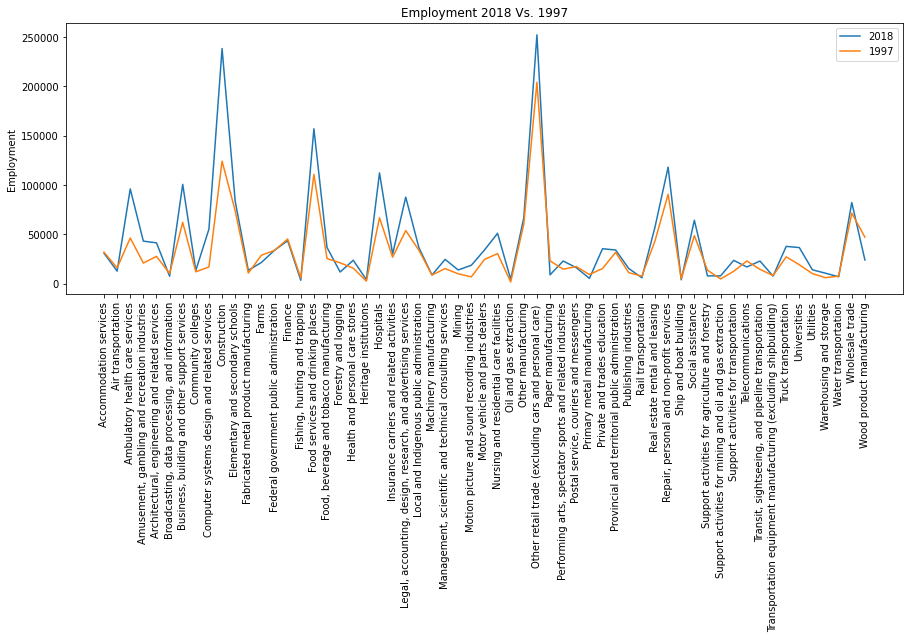

In [52]:
output_2018_df = output_df[output_df['SYEAR'] == 2018]
fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(pd.crosstab(output_2018_df['LMO_Detailed_Industry'], [output_2018_df['SYEAR']], 
                    values = output_2018_df['Employment'], aggfunc='mean'), label='2018')
plt.xticks(rotation='vertical')


output_1997_df = output_df[output_df['SYEAR'] == 1997]

ax.plot(pd.crosstab(output_1997_df['LMO_Detailed_Industry'], [output_1997_df['SYEAR']], 
                    values = output_1997_df['Employment'], aggfunc='mean'), label='1997')
plt.ylabel('Employment')
plt.title('Employment 2018 Vs. 1997')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()